In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 기존 학습 데이터 확인

In [ ]:
real_data = pd.read_csv("/content/drive/MyDrive/인공지능1/팀플/fake News Detection with NLP and LSTM/data/True.csv")
fake_data = pd.read_csv("/content/drive/MyDrive/인공지능1/팀플/fake News Detection with NLP and LSTM/data/Fake.csv")

4659
4077
2789
2461
5204


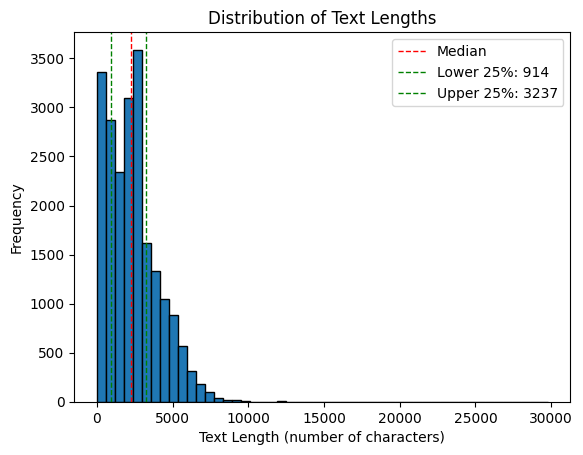

In [ ]:
for i in range(5):
  print(len(list(real_data["text"])[i]))

import numpy as np
import matplotlib.pyplot as plt

# 각 텍스트의 글자 수를 저장할 리스트 초기화
text_lengths = []

# 텍스트의 글자 수를 계산하여 리스트에 추가
for text in real_data["text"]:
    text_lengths.append(len(text))

# 중앙값 계산
median_length = np.median(text_lengths)

# 중앙값 주변 50%의 범위 계산
lower_percentile = np.percentile(text_lengths, 25)
upper_percentile = np.percentile(text_lengths, 75)

# 글자수 분포를 시각화
plt.hist(text_lengths, bins=50, edgecolor='black')
plt.axvline(median_length, color='red', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(lower_percentile, color='green', linestyle='dashed', linewidth=1, label='Lower 25%: {}'.format(int(lower_percentile)))
plt.axvline(upper_percentile, color='green', linestyle='dashed', linewidth=1, label='Upper 25%: {}'.format(int(upper_percentile)))
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (number of characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


2893
1898
3597
2774
2346


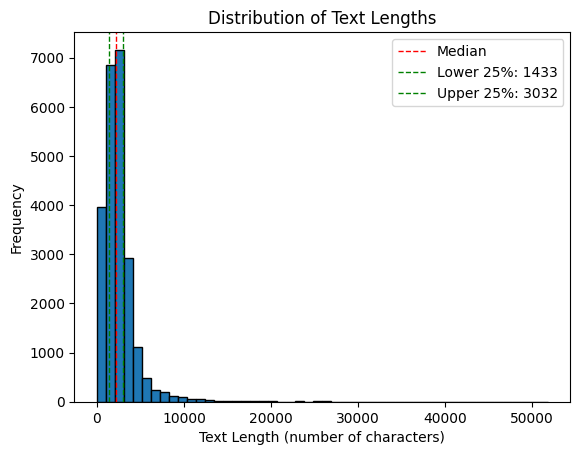

In [ ]:
for i in range(5):
  print(len(list(fake_data["text"])[i]))

# 각 텍스트의 글자 수를 저장할 리스트 초기화
text_lengths = []

# 텍스트의 글자 수를 계산하여 리스트에 추가
for text in fake_data["text"]:
    text_lengths.append(len(text))

# 중앙값 계산
median_length = np.median(text_lengths)

# 중앙값 주변 50%의 범위 계산
lower_percentile = np.percentile(text_lengths, 25)
upper_percentile = np.percentile(text_lengths, 75)

# 글자수 분포를 시각화
plt.hist(text_lengths, bins=50, edgecolor='black')
plt.axvline(median_length, color='red', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(lower_percentile, color='green', linestyle='dashed', linewidth=1, label='Lower 25%: {}'.format(int(lower_percentile)))
plt.axvline(upper_percentile, color='green', linestyle='dashed', linewidth=1, label='Upper 25%: {}'.format(int(upper_percentile)))
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (number of characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 학습에 사용할 추가 data set
# Time지 뉴스기사 크롤링

In [ ]:
pip install beautifulsoup4

In [ ]:
# Time지 크롤링
import pandas as pd
import requests
from bs4 import BeautifulSoup as Soup
from urllib.parse import urljoin

article_head_l, article_body_l, article_media_time_l = [], [], []

for i in range(701, 751):
    url = f'https://time.com/section/politics/?page={i}'
    html = requests.get(url)
    text = Soup(html.text, 'html.parser')
    articles = text.find_all('div', 'taxonomy-tout')

    for article in articles:
        headline = article.find("h2", 'headline').get_text().strip()
        media_time = article.find("span", "byline").get_text().strip()
        article_link_element = article.find("a")
        article_link = article_link_element['href'] if article_link_element else 'Link not available'

        # Complete the relative URL to a full URL
        full_article_link = urljoin(url, article_link)

        # Access the individual article link to get the full article text
        article_html = requests.get(full_article_link)
        article_text = Soup(article_html.text, 'html.parser')

        # Find all <p> elements with the specific class and concatenate their text
        paragraphs = article_text.find_all("p", class_="self-baseline px-0 font-pt-serif text-17px leading-7 tracking-0.5px")
        article_body = " ".join(p.get_text().strip() for p in paragraphs) if paragraphs else "No article body available"

        article_head_l.append(headline)
        article_media_time_l.append(media_time)
        article_body_l.append(article_body)

# # Print the collected information for verification
# for i in range(len(article_head_l)):
#     print("Title:", article_head_l[i])
#     print("Body:", article_body_l[i][:100])  # Print only the first 100 characters of the article body for brevity
#     print("Media Time:", article_media_time_l[i])
#     print("------")


In [ ]:
# 크롤링한 데이터에서 "article body"에 해당하는 텍스트를 가져옴
article_bodies = article_body_l

# 글자수가 800에서 4000 사이인 뉴스 기사만 남기기 위한 필터링
filtered_articles = []

for i in range(len(article_head_l)):
    article_body = article_bodies[i]
    length = len(article_body)
    if 800 <= length <= 4000:
        filtered_articles.append([article_head_l[i], article_body, article_media_time_l[i]])

# 결과 출력
print("Filtered Articles Count:", len(filtered_articles))

In [ ]:
News = []
for i in range(len(filtered_articles)) :
  News.append([filtered_articles[i][0], filtered_articles[i][1],"politicsNews" ,filtered_articles[i][2], "True"])

df = pd.DataFrame(News, columns=["title", "text", 'subject', "date", "Fake/True"])

In [ ]:
df

In [ ]:
df.to_csv("filtered_articles_5.csv", sep=",", index=False)

In [ ]:
import pickle
# 데이터프레임 pickle 파일로 저장
df.to_pickle("/content/drive/MyDrive/인공지능1/팀플/filtered_articles_5.pkl")

# 리스트 pickle 파일로 저장
with open("/content/drive/MyDrive/인공지능1/팀플/News_5.pkl", "wb") as f:
  pickle.dump(News, f)

# 크롤링을 통해 수집된 데이터 확인
총 1645개의 기사


In [ ]:
# pickle 파일 이름
import pickle
# pickle 파일에서 기사 로드
with open("/content/drive/MyDrive/인공지능1/팀플/Crawling_Timenews.pkl", "rb") as f:
    df1 = pickle.load(f)


df1.to_csv("/content/drive/MyDrive/인공지능1/팀플/Crawling_Timenews.csv")

df1.columns = ['title', 'text', 'subject', 'date', 'fake/false']
df1

,title,text,subject,date,fake/false
0,Trump Blames Everything But Guns,President Donald Trump called for a crackdown ...,politicsNews,By Tessa Berenson Rogers,True
1,"Trump Suggests Deal for Background Checks, Imm...",President Donald Trump on Monday suggested Con...,politicsNews,By Ciara Nugent,True
2,Beto O'Rourke Halts Campaign to Return to El Paso,2020 Democratic presidential candidate Beto O’...,politicsNews,By Josiah Bates,True
3,Ilhan Omar Trolls Trump With Pictures From Afr...,Congresswoman Ilhan Omar responded Thursday to...,politicsNews,"By Amy Gunia August 2, 2019",True
4,A Marianne Williamson Supporter Instructed a C...,In what is certainly one of the more confusing...,politicsNews,"By Rachel E. Greenspan August 1, 2019",True
...,...,...,...,...,...
1640,8chan Owner Called to Testify Before Congress ...,Congress Tuesday called on the owner of online...,politicsNews,"By Amy Gunia August 7, 2019",True
1641,'May I Give You a Hug?',Yvonne Loya sat against a metal railing on a c...,politicsNews,"By Lissandra Villa / El Paso, Texas August 6,...",True
1642,Dayton Mayor Criticizes Trump Ahead of Preside...,"The mayor of Dayton, Ohio, was underwhelmed by...",politicsNews,"By Tara Law August 6, 2019",True
1643,Ohio's Governor Proposes Gun Laws After Shooting,Ohio Gov. Mike DeWine introduced a series of p...,politicsNews,"By Sanya Mansoor August 6, 2019",True


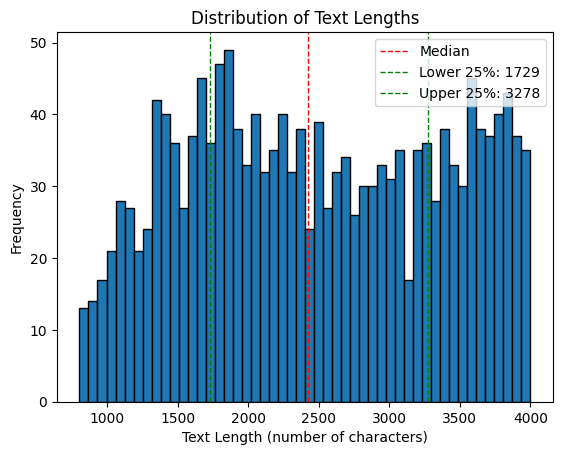

In [ ]:
# 각 텍스트의 글자 수를 저장할 리스트 초기화
text_lengths = []

# 텍스트의 글자 수를 계산하여 리스트에 추가
for text in df1["text"]:
    text_lengths.append(len(text))

# 중앙값 계산
median_length = np.median(text_lengths)

# 중앙값 주변 50%의 범위 계산
lower_percentile = np.percentile(text_lengths, 25)
upper_percentile = np.percentile(text_lengths, 75)

# 글자수 분포를 시각화
plt.hist(text_lengths, bins=50, edgecolor='black')
plt.axvline(median_length, color='red', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(lower_percentile, color='green', linestyle='dashed', linewidth=1, label='Lower 25%: {}'.format(int(lower_percentile)))
plt.axvline(upper_percentile, color='green', linestyle='dashed', linewidth=1, label='Upper 25%: {}'.format(int(upper_percentile)))
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (number of characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 추가 크롤링
총 1321개의 기사


In [ ]:
# pickle 파일 이름
import pickle
# pickle 파일에서 기사 로드
with open("/content/drive/MyDrive/인공지능1/팀플/filtered_articles_2.pkl", "rb") as f:
    df1 = pickle.load(f)


df1.to_csv("/content/drive/MyDrive/인공지능1/팀플/Crawling_Timenews_2.csv")

df1.columns = ['title', 'text', 'subject', 'date', 'fake/false']
df1

,title,text,subject,date,fake/false
0,Trump Signs Immigration Order,"In a sudden reversal, President Trump on Wedne...",politicsNews,By Alana Abramson,True
1,Girl With Down Syndrome Separated from Mother ...,U.S. Customs and Border Protection has confirm...,politicsNews,By Gina Martinez,True
2,Trump Administration Scouting Military Bases t...,"With federal facilities running out of room, t...",politicsNews,"By W.J. Hennigan June 20, 2018",True
3,Mike Pompeo Vows U.S. Will Protect 'the Most V...,Secretary of State Mike Pompeo released a stat...,politicsNews,"By Gina Martinez June 20, 2018",True
4,Koch Brothers' Groups Are Lobbying Congress to...,The network backed by billionaire brothers Cha...,politicsNews,"By Alana Abramson June 20, 2018",True
...,...,...,...,...,...
1316,Here's Why Robert E. Lee Opposed Confederate M...,As it remains to be seen whether Charlottesvil...,politicsNews,"By Olivia B. Waxman August 16, 2017",True
1317,Top Military Leaders Who Advise President Trum...,Four members of the Joint Chiefs of Staff have...,politicsNews,"By Rachel Lewis August 16, 2017",True
1318,Both Presidents Bush Condemn Hatred a Day Afte...,Both presidents Bush released a joint statemen...,politicsNews,"By Maya Rhodan August 16, 2017",True
1319,How President Trump Failed a Test,"In times of sorrow and crisis, the American pe...",politicsNews,"By Zeke J Miller August 16, 2017",True


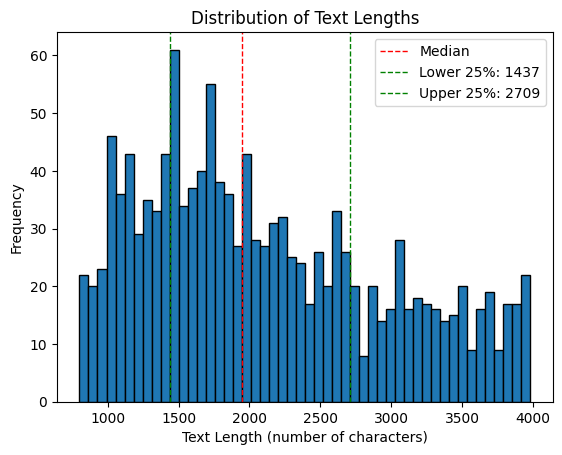

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 각 텍스트의 글자 수를 저장할 리스트 초기화
text_lengths = []

# 텍스트의 글자 수를 계산하여 리스트에 추가
for text in df1["text"]:
    text_lengths.append(len(text))

# 중앙값 계산
median_length = np.median(text_lengths)

# 중앙값 주변 50%의 범위 계산
lower_percentile = np.percentile(text_lengths, 25)
upper_percentile = np.percentile(text_lengths, 75)

# 글자수 분포를 시각화
plt.hist(text_lengths, bins=50, edgecolor='black')
plt.axvline(median_length, color='red', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(lower_percentile, color='green', linestyle='dashed', linewidth=1, label='Lower 25%: {}'.format(int(lower_percentile)))
plt.axvline(upper_percentile, color='green', linestyle='dashed', linewidth=1, label='Upper 25%: {}'.format(int(upper_percentile)))
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (number of characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 추가크롤링_2


In [ ]:
# pickle 파일 이름
import pickle
# pickle 파일에서 기사 로드
with open("/content/drive/MyDrive/인공지능1/팀플/filtered_articles_3.pkl", "rb") as f:
    df1 = pickle.load(f)


df1.to_csv("/content/drive/MyDrive/인공지능1/팀플/Crawling_Timenews_3.csv")

df1.columns = ['title', 'text', 'subject', 'date', 'fake/false']
df1

,title,text,subject,date,fake/false
0,'Completely Unhinged.' Late-Night TV Reacts to...,Late-night TV hosts went after President Donal...,politicsNews,By Katie Reilly,True
1,Obama's Charlottesville Tweet Officially The M...,Former President Barack Obama’s Twitter respon...,politicsNews,By Helen Regan,True
2,"A Confederate Statue Is Gone, But the Fight Re...",There are more than 230 memorials to the Civil...,politicsNews,"By Nash Jenkins / Durham, N.C.",True
3,Republicans Condemn Trump's Latest Charlottesv...,Republicans spoke out on Tuesday against Presi...,politicsNews,"By Katie Reilly August 15, 2017",True
4,White Supremacists Loved Trump's Latest Comments,President Donald Trump’s latest remarks about ...,politicsNews,"By Katie Reilly August 15, 2017",True
...,...,...,...,...,...
1405,Watch Live: President Trump Addresses MacDill ...,President Donald Trump will address troops at ...,politicsNews,"By Maya Rhodan February 6, 2017",True
1406,President Trump Defends Travel Ban: 'Any Negat...,President Donald Trump said in an early-mornin...,politicsNews,"By Maya Rhodan February 6, 2017",True
1407,President Trump's Immigration Ban Faces a Majo...,The fate of President Donald Trump‘s controver...,politicsNews,"By Maya Rhodan February 6, 2017",True
1408,Mike Pence Was Asked If America is Morally Sup...,Vice President Mike Pence wouldn’t say America...,politicsNews,"By Mahita Gajanan February 5, 2017",True


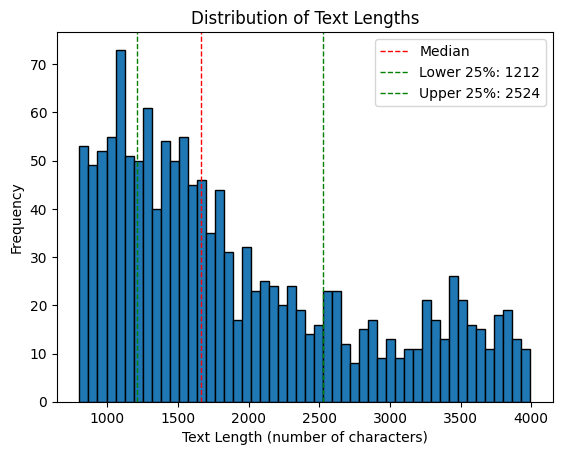

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 각 텍스트의 글자 수를 저장할 리스트 초기화
text_lengths = []

# 텍스트의 글자 수를 계산하여 리스트에 추가
for text in df1["text"]:
    text_lengths.append(len(text))

# 중앙값 계산
median_length = np.median(text_lengths)

# 중앙값 주변 50%의 범위 계산
lower_percentile = np.percentile(text_lengths, 25)
upper_percentile = np.percentile(text_lengths, 75)

# 글자수 분포를 시각화
plt.hist(text_lengths, bins=50, edgecolor='black')
plt.axvline(median_length, color='red', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(lower_percentile, color='green', linestyle='dashed', linewidth=1, label='Lower 25%: {}'.format(int(lower_percentile)))
plt.axvline(upper_percentile, color='green', linestyle='dashed', linewidth=1, label='Upper 25%: {}'.format(int(upper_percentile)))
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (number of characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 추가크롤링_3



In [ ]:
# pickle 파일 이름
import pickle
# pickle 파일에서 기사 로드
with open("/content/drive/MyDrive/인공지능1/팀플/filtered_articles_4.pkl", "rb") as f:
    df1 = pickle.load(f)


df1.to_csv("/content/drive/MyDrive/인공지능1/팀플/Crawling_Timenews_4.csv")

df1.columns = ['title', 'text', 'subject', 'date', 'fake/false']
df1

,title,text,subject,date,fake/false
0,Watch a Candidate Shoot a Machine Gun in This ...,"Each election cycle, the list of most memorabl...",politicsNews,By Brendan Dorsey,True
1,Donald Trump Appears to Admit he Was Wrong on ...,Donald Trump appears to have admitted he was w...,politicsNews,By Mahita Gajanan,True
2,The World's Olympians Have Little Love For Don...,"The Olympics are billed as a respite from war,...",politicsNews,"By Sean Gregory / Rio de Janeiro August 5, 2016",True
3,Clinton Pulls Ahead,A new poll shows Hillary Clinton jumping to a ...,politicsNews,"By Will Drabold August 4, 2016",True
4,Obama: Trump's Rigged Election Claim Is 'Ridic...,President Obama rebuffed Donald Trump’s sugges...,politicsNews,"By Daniel White and Maya Rhodan August 4, 2016",True
...,...,...,...,...,...
1202,Watch Hillary Clinton's 'Excuse Me' Moment,Hillary Clinton’s “excuse me” got a much diffe...,politicsNews,"By Maya Rhodan March 9, 2016",True
1203,Watch Clinton Describe Her Ideal Supreme Court...,Hillary Clinton didn’t name any judges she thi...,politicsNews,"By Tessa Berenson Rogers March 9, 2016",True
1204,Watch Clinton Describe Trump's 'Beautiful Tall...,Hillary Clinton took some time out at Wednesda...,politicsNews,"By Daniel White March 9, 2016",True
1205,Sanders Recycles a 2008 Argument Against Clinton,"During Wednesday night’s Democratic debate, Be...",politicsNews,"By Tessa Berenson Rogers March 9, 2016",True


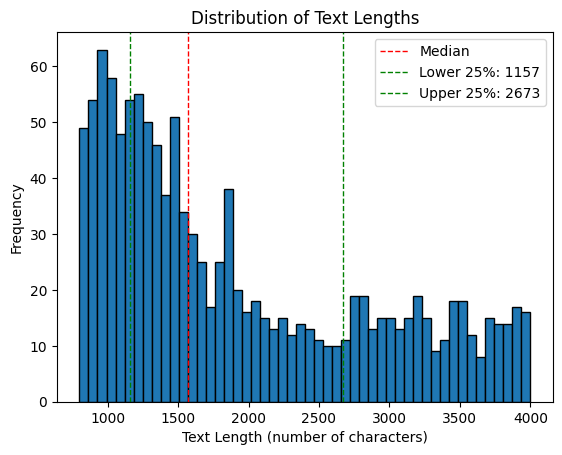

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 각 텍스트의 글자 수를 저장할 리스트 초기화
text_lengths = []

# 텍스트의 글자 수를 계산하여 리스트에 추가
for text in df1["text"]:
    text_lengths.append(len(text))

# 중앙값 계산
median_length = np.median(text_lengths)

# 중앙값 주변 50%의 범위 계산
lower_percentile = np.percentile(text_lengths, 25)
upper_percentile = np.percentile(text_lengths, 75)

# 글자수 분포를 시각화
plt.hist(text_lengths, bins=50, edgecolor='black')
plt.axvline(median_length, color='red', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(lower_percentile, color='green', linestyle='dashed', linewidth=1, label='Lower 25%: {}'.format(int(lower_percentile)))
plt.axvline(upper_percentile, color='green', linestyle='dashed', linewidth=1, label='Upper 25%: {}'.format(int(upper_percentile)))
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (number of characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# time News title 모음

In [ ]:
import pandas as pd
import pickle


# 전체 타이틀 리스트
title_list = df1['title'].tolist()

# 200개씩 끊어서 저장
for i in range(0, len(title_list), 200):
    # 각 부분 리스트를 가져옴
    part_list = title_list[i:i+200]
    file_name = f'/content/drive/MyDrive/인공지능1/팀플/titles_list_4_{i//200 + 1}.pkl'

    # 리스트를 pickle 파일로 저장
    with open(file_name, 'wb') as file:
        pickle.dump(part_list, file)

    print(f"Titles have been successfully saved to {file_name}")


Titles have been successfully saved to /content/drive/MyDrive/인공지능1/팀플/titles_list_4_1.pkl
Titles have been successfully saved to /content/drive/MyDrive/인공지능1/팀플/titles_list_4_2.pkl
Titles have been successfully saved to /content/drive/MyDrive/인공지능1/팀플/titles_list_4_3.pkl
Titles have been successfully saved to /content/drive/MyDrive/인공지능1/팀플/titles_list_4_4.pkl
Titles have been successfully saved to /content/drive/MyDrive/인공지능1/팀플/titles_list_4_5.pkl
Titles have been successfully saved to /content/drive/MyDrive/인공지능1/팀플/titles_list_4_6.pkl
Titles have been successfully saved to /content/drive/MyDrive/인공지능1/팀플/titles_list_4_7.pkl


In [ ]:
import pickle

# 파일 경로들을 리스트로 준비
file_paths = ['/content/drive/MyDrive/인공지능1/팀플/titles_list_4_1.pkl', '/content/drive/MyDrive/인공지능1/팀플/titles_list_4_2.pkl', '/content/drive/MyDrive/인공지능1/팀플/titles_list_4_3.pkl',
              '/content/drive/MyDrive/인공지능1/팀플/titles_list_4_4.pkl', '/content/drive/MyDrive/인공지능1/팀플/titles_list_4_5.pkl', '/content/drive/MyDrive/인공지능1/팀플/titles_list_4_6.pkl',
              '/content/drive/MyDrive/인공지능1/팀플/titles_list_4_7.pkl']  # 필요한 파일들을 여기에 추가

# 모든 리스트를 하나로 합치기
combined_list = []
for file_path in file_paths:
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
        combined_list.extend(data)

# 결과를 새로운 pickle 파일로 저장
with open('/content/drive/MyDrive/인공지능1/팀플/titles_list_all_4.pkl', 'wb') as outfile:
    pickle.dump(combined_list, outfile)

print('모든 데이터가 titles_list_all_2.pkl에 저장되었습니다.')

모든 데이터가 titles_list_all_2.pkl에 저장되었습니다.


# ChatGPT3.5Turbo_generated_fake_news

In [ ]:
import pandas as pd
generated_news_GPT3_5T = pd.read_csv("/content/drive/MyDrive/인공지능1/팀플/ChatGPT_3.5Turbo_generated_news_article.csv")

generated_news_GPT3_5T['date'] = '2024.06.08'
generated_news_GPT3_5T['fake/false'] = 'fake'


generated_news_GPT3_5T = generated_news_GPT3_5T.drop('Unnamed: 0', axis=1)

generated_news_GPT3_5T.to_csv("/content/drive/MyDrive/인공지능1/팀플/ChatGPT_3.5Turbo_generated_news_article.csv")


generated_news_GPT3_5T

,title,text,subject,date,fake/false
0,"""From the Frontlines to the Campaign Trail: Ma...","As the 2020 election season approaches, Arizon...","For Martha McSally, a Never-Ending Campaign Co...",2024.06.08,fake
1,"""Trump Urges Fed to Avoid 'Repeat Offender' St...","In a recent tweet, President Donald Trump once...",President Trump Wants Fed to Avoid 'Yet Anothe...,2024.06.08,fake
2,"""Comey's Fury: Former FBI Director Unleashes C...","In a shocking turn of events, former FBI Direc...",James Comey Slams the Republican Party After S...,2024.06.08,fake
3,"""From One First Lady to Another: Michelle Obam...",Former First Lady Michelle Obama recently made...,Michelle Obama on How Their 'Refreshing' Tradi...,2024.06.08,fake
4,"""North Korea Defiant: U.S. Sanctions and Press...",In the midst of escalating tensions between th...,North Korea: U.S. Sanctions and Pressure 'Woul...,2024.06.08,fake
...,...,...,...,...,...
1640,"""Breaking: White House Denies Ivanka Trump's B...",Washington D.C. - In a surprise turn of events...,Ivanka Trump Isn't in the Running to Lead the ...,2024.06.08,fake
1641,"""Silence is Golden: Why Trump's No-Statement S...","In a recent press conference, White House Pres...",Trump 'Should Make No Statement...',2024.06.08,fake
1642,"""Tlaib's Expletive Sparks 5x More Headlines th...",A new report has revealed a stark difference i...,Report: Rep. Tlaib's Profanity Received 5 Time...,2024.06.08,fake
1643,"""White House Contemplates Confrontation: Possi...","Washington D.C., USA - The White House has bee...",White House May Have Sought Options to Strike ...,2024.06.08,fake


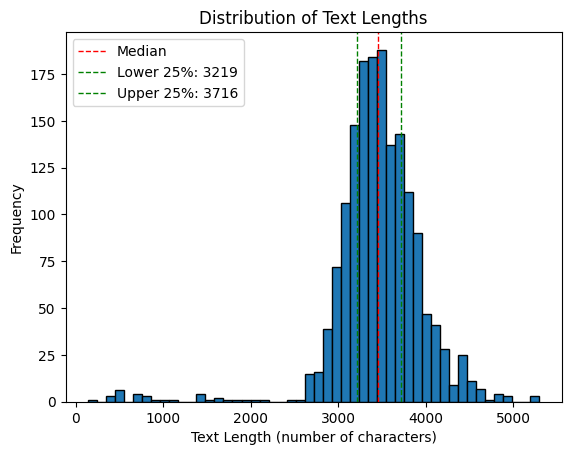

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 각 텍스트의 글자 수를 저장할 리스트 초기화
text_lengths = []

# 텍스트의 글자 수를 계산하여 리스트에 추가
for text in generated_news_GPT3_5T["text"]:
    text_lengths.append(len(text))

# 중앙값 계산
median_length = np.median(text_lengths)

# 중앙값 주변 50%의 범위 계산
lower_percentile = np.percentile(text_lengths, 25)
upper_percentile = np.percentile(text_lengths, 75)

# 글자수 분포를 시각화
plt.hist(text_lengths, bins=50, edgecolor='black')
plt.axvline(median_length, color='red', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(lower_percentile, color='green', linestyle='dashed', linewidth=1, label='Lower 25%: {}'.format(int(lower_percentile)))
plt.axvline(upper_percentile, color='green', linestyle='dashed', linewidth=1, label='Upper 25%: {}'.format(int(upper_percentile)))
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (number of characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()